Apply High-Boost filtering with factors A = 1.2, 1.5, 2.0.
•Which one gives the sharpest image?
•Which one introduces too much noise?


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read your uploaded image
img = cv2.imread("/content/aamichithu.jpg",0)

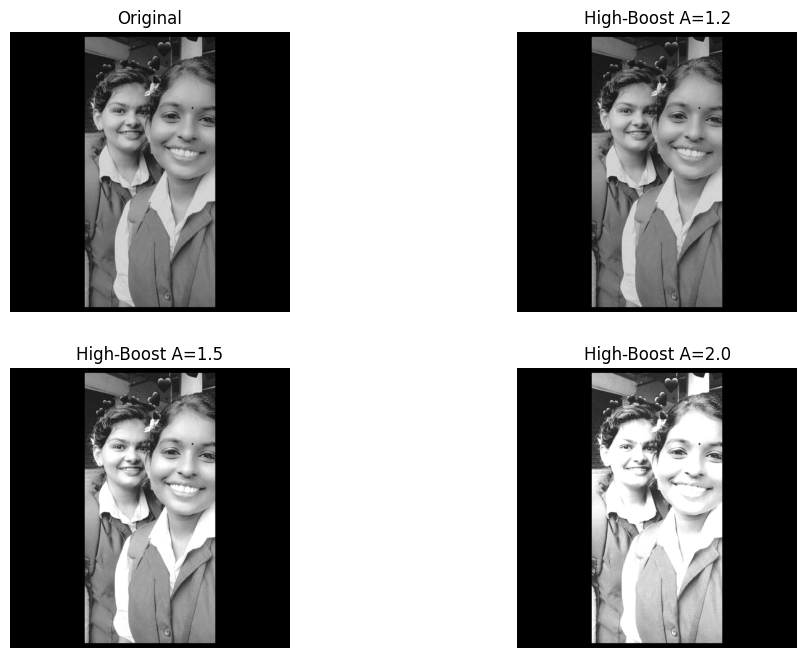

In [ ]:
# Function for High-Boost Filtering
def high_boost_filter(image, A, ksize=(5,5)):
    # Smooth the image using Gaussian blur
    blurred = cv2.GaussianBlur(image, ksize, 0)

    # High-boost formula
    mask = cv2.subtract(image, blurred)  # high-pass mask
    boosted = cv2.addWeighted(image, A, mask, 1, 0)  # g = A*f + 1*mask

    return boosted

# Apply with different A values
hb_1_2 = high_boost_filter(img, 1.2)
hb_1_5 = high_boost_filter(img, 1.5)
hb_2_0 = high_boost_filter(img, 2.0)

# Display results
titles = ['Original', 'High-Boost A=1.2', 'High-Boost A=1.5', 'High-Boost A=2.0']
images = [img, hb_1_2, hb_1_5, hb_2_0]

plt.figure(figsize=(12,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

Sharpest image: A = 2.0

Introduces too much noise: also A = 2.0 (oversharpening enhances noise specks).

Best balance: usually A = 1.5

A = 1.2 → Slight sharpening, looks natural, low noise.

A = 1.5 → Stronger sharpening, edges very clear, still acceptable.

A = 2.0 → Sharpest, but amplifies noise heavily (especially if the image has salt & pepper noise).

Apply Sobel filter on:
•A simple shape (rectangle or circle)
•A natural scene (road, face, building)
Compare and explain the differences in edge detection.

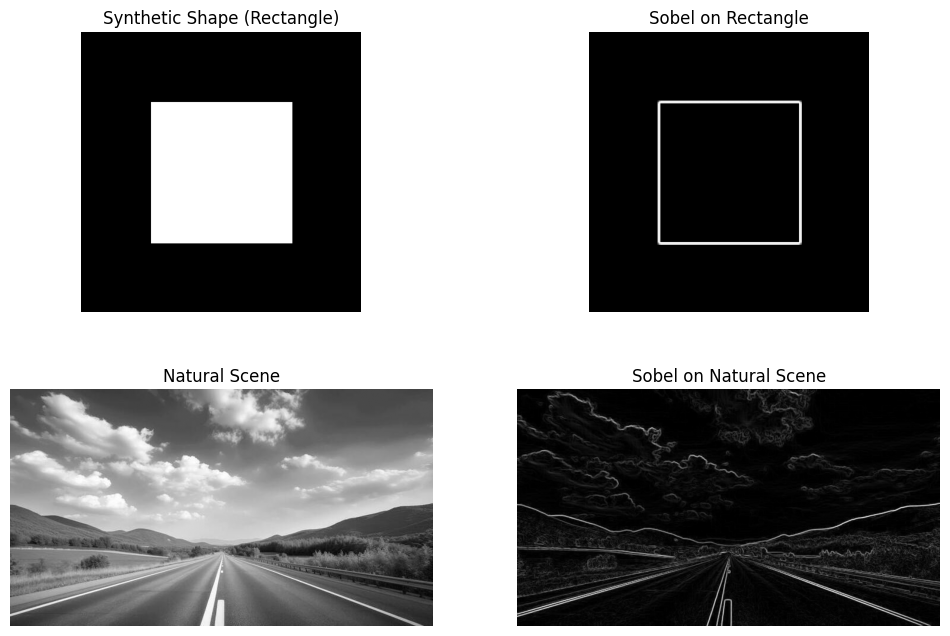

In [ ]:
#Synthetic Shape (Rectangle)
shape = np.zeros((200, 200), dtype=np.uint8)
cv2.rectangle(shape, (50,50), (150,150), 255, -1)  # white rectangle

# Sobel on shape
sobelx_shape = cv2.Sobel(shape, cv2.CV_64F, 1, 0, ksize=3)
sobely_shape = cv2.Sobel(shape, cv2.CV_64F, 0, 1, ksize=3)
sobel_shape = cv2.magnitude(sobelx_shape, sobely_shape)


# 2. Natural Scene (Upload)

# Upload a natural image (road, face, building)
# Example: replace with your uploaded file path
natural = cv2.imread("/content/sky road.jpg", cv2.IMREAD_GRAYSCALE)

# Sobel on natural scene
sobelx_nat = cv2.Sobel(natural, cv2.CV_64F, 1, 0, ksize=3)
sobely_nat = cv2.Sobel(natural, cv2.CV_64F, 0, 1, ksize=3)
sobel_nat = cv2.magnitude(sobelx_nat, sobely_nat)


# Show Results

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(shape, cmap='gray')
plt.title("Synthetic Shape (Rectangle)")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(sobel_shape, cmap='gray')
plt.title("Sobel on Rectangle")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(natural, cmap='gray')
plt.title("Natural Scene")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(sobel_nat, cmap='gray')
plt.title("Sobel on Natural Scene")
plt.axis("off")

plt.show()

For synthetic shape → we’ll generate a black background with a white rectangle/circle.

For natural scene → you can upload one (road, face, or building).

Synthetic Shape (Rectangle / Circle):

Edges are clear, sharp, continuous.

Sobel finds strong edges at boundaries because shapes have uniform intensity regions.

Result: almost perfect outline of the shape.

Natural Scene (Road, Face, Building):

Edges are complex, textured, and noisy.

Sobel detects not only object boundaries, but also tiny intensity changes (wrinkles, bricks, road textures, etc.).

Result: cluttered edge map with many details, harder to interpret.

On simple shapes, Sobel is very effective → detects only the actual boundaries.

On natural scenes, Sobel detects too many edges, including texture noise. This is why in practice, we often use Canny Edge Detector (with thresholds & non-max suppression) for natural images.